In [ ]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Import files from drive.

# from google.colab import drive
# drive.mount('/content/gdrive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
dataset_labels = drive.CreateFile({'id': '1BFMOae6_mh0FAADOEAmMgKEyxVLnyLx-'})
dataset_labels.GetContentFile('labels.csv')

In [ ]:
dataset_values = drive.CreateFile({'id': '1H-6GzuPgEkHrJuA0ZN932tyAynasX231'})
dataset_values.GetContentFile('values.csv')

In [ ]:
s =drive.CreateFile({'id': '1AJtJeG7Ca3eUl-VAt2wJrF6vOVLUwBIW'})
s.GetContentFile('piso_altura.csv')
para_scatter = pd.read_csv('piso_altura.csv')

## Analisis Exploratorio

### Analisis inicial.


#### cambio tipos para optimizar memoria en dataframe labels

In [ ]:
train_labels_dataset = pd.read_csv('labels.csv', dtype = {
    'building_id' : 'int32',
    'damage_grade' : 'int16'
})

In [ ]:
train_labels_dataset.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
train_labels_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int32
 1   damage_grade  260601 non-null  int16
dtypes: int16(1), int32(1)
memory usage: 1.5 MB


#### cambio de tipos para optimizar memoria en dataframe values

In [ ]:
train_values_dataset = pd.read_csv('values.csv', dtype = {
                            'geo_level_1_id':'int16',
                            'geo_level_2_id':'int16',
                            'geo_level_3_id':'int16',
                            'count_floors_pre_eq':'int16',
                            'age':'int16',
                            'area_percentage':'int16',
                            'height_percentage':'int16',
                            'land_surface_condition':'category',                 
                            'foundation_type':'category',                          
                            'roof_type':'category',                                 
                            'ground_floor_type':'category',                        
                            'other_floor_type':'category',                          
                            'position':'category',                                  
                            'plan_configuration':'category',
                            'has_superstructure_adobe_mud':'bool',               
                            'has_superstructure_mud_mortar_stone':'bool',        
                            'has_superstructure_stone_flag':'bool',             
                            'has_superstructure_cement_mortar_stone':'bool',     
                            'has_superstructure_mud_mortar_brick':'bool',        
                            'has_superstructure_cement_mortar_brick':'bool',     
                            'has_superstructure_timber':'bool',                  
                            'has_superstructure_bamboo':'bool',                  
                            'has_superstructure_rc_non_engineered':'bool',       
                            'has_superstructure_rc_engineered':'bool',          
                            'has_superstructure_other':'bool',
                            'legal_ownership_status':'category',
                            'count_families':'int16',
                            'has_secondary_use':'bool',                          
                            'has_secondary_use_agriculture':'bool',             
                            'has_secondary_use_hotel':'bool',                    
                            'has_secondary_use_rental':'bool',                  
                            'has_secondary_use_institution':'bool',             
                            'has_secondary_use_school':'bool',                
                            'has_secondary_use_industry':'bool',              
                            'has_secondary_use_health_post':'bool',         
                            'has_secondary_use_gov_office':'bool',           
                            'has_secondary_use_use_police':'bool',             
                            'has_secondary_use_other':'bool'                   
                        })

In [ ]:
train_values_dataset.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,True,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,False,True,False,False,False,False,True,True,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,True,False,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_values_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int16   
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

### Manejo Nulos y Nan.

In [ ]:
cantidad_edificios = train_values_dataset["building_id"].count()
cantidad_edificios

260601

In [ ]:
# Cantidad de nulos por columna.
train_values_dataset.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [ ]:
# Cantidad de Nan por columna.
train_values_dataset.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Porcentaje datos validos.

In [ ]:
datos_validos = train_values_dataset.count().reset_index()
datos_validos["Porcentaje_datos_validos"] = (cantidad_edificios / datos_validos[0]) * 100
datos_validos_por_columna = datos_validos[["index","Porcentaje_datos_validos"]]
datos_validos_por_columna

,index,Porcentaje_datos_validos
0,building_id,100.0
1,geo_level_1_id,100.0
2,geo_level_2_id,100.0
3,geo_level_3_id,100.0
4,count_floors_pre_eq,100.0
5,age,100.0
6,area_percentage,100.0
7,height_percentage,100.0
8,land_surface_condition,100.0
9,foundation_type,100.0


### Analisis Segun Edad

#### Filtrado datos y merge.

In [ ]:
datos_edad = train_values_dataset[["building_id", "age"]]
datos_edad_merged = pd.merge(left=datos_edad, right=train_labels_dataset, how="inner", on="building_id")
datos_edad_filtrados = datos_edad_merged[["damage_grade", "age"]]
datos_edad_filtrados.head(1)

,damage_grade,age
0,3,30


#### Edades comparadas a promedio segun damage_grade.

In [ ]:
datos_promedio = datos_edad_filtrados
datos_promedio["Supera_Promedio_Edad"] = datos_promedio["age"] > datos_promedio["age"].mean()
datos_promedio["Debajo_Promedio_Edad"] = datos_promedio["age"] <= datos_promedio["age"].mean()
datos_promedio_final = datos_promedio.groupby("damage_grade").agg({"Supera_Promedio_Edad": "count", "Debajo_Promedio_Edad": "count"}).reset_index()
datos_promedio_final

,damage_grade,Supera_Promedio_Edad,Debajo_Promedio_Edad
0,1,25124,25124
1,2,148259,148259
2,3,87218,87218


#### Rango edades segun damage_grade.

In [ ]:
# Obtengo los rangos de edad segun el damage grade, para edificios entre 0 a 100 anios.
datos_rangos = datos_edad_filtrados
datos_rangos["Damage_3"] = datos_rangos["damage_grade"] == 3
datos_rangos["Damage_2"] = datos_rangos["damage_grade"] == 2
datos_rangos["Damage_1"] = datos_rangos["damage_grade"] == 1
datos_rangos_final = datos_rangos.groupby("age").agg({"Damage_3" : "sum", "Damage_2" : "sum", "Damage_1" : "sum"}).reset_index()


##### Rangos menores a 100 anios.

In [ ]:
datos_rangos_edad_menor_100 = datos_rangos_final[datos_rangos_final["age"] <= 100]
datos_rangos_edad_menor_100.head(5)

,age,Damage_3,Damage_2,Damage_1
0,0,6107,12721,7213
1,5,9077,19030,5590
2,10,12166,22370,4360
3,15,12365,20767,2878
4,20,11625,18603,1954


##### Rangos mayores a 100 anios.

In [ ]:
datos_rangos_edad_mayor_100 = datos_rangos_final[datos_rangos_final["age"] > 100]
datos_rangos_edad_mayor_100.head(5)

,age,Damage_3,Damage_2,Damage_1
21,105,32,56,1
22,110,35,64,1
23,115,10,10,1
24,120,80,98,2
25,125,11,26,0


### Analisis materiales

*  hay algun nivel de daño en comun para todos los materiales?
*   cual es el promedio de daño para cada material?
*   cual es el material que mas daño tuvo?



In [ ]:
danio_y_materiales = ['damage_grade','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag'\
,'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber'\
,'has_superstructure_bamboo','has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered','has_superstructure_other']

In [ ]:
materiales = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag'\
,'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_timber'\
,'has_superstructure_bamboo','has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered','has_superstructure_other']

In [ ]:
usos_edificios = ['agricultura','hoteleria','renta','institucional','escolar','industial','salud','gobierno','policial', 'otro']

In [ ]:
nombres_x = ('barro/adobe', 'barro-piedra', \
'piedra', 'cemento-piedra', 'barro-ladrillo', 'cemento-ladrillo', 'timber','bambú', 'concreto no diseñado','concreto diseñado','otro')

In [ ]:
df_con_damage = train_labels_dataset.merge(train_values_dataset, how= 'inner')
df_danio_y_materiales = df_con_damage.loc[:,danio_y_materiales]

In [ ]:
df_media_materiales = df_con_damage.loc[:, danio_y_materiales].apply(lambda x: x * list(df_con_damage['damage_grade'])).replace(0, np.nan)
del df_media_materiales['damage_grade']
df_media_materiales

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
260596,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260597,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260598,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260599,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


[Text(0, 0, 'barro/adobe'),
 Text(0, 0, 'barro-piedra'),
 Text(0, 0, 'piedra'),
 Text(0, 0, 'cemento-piedra'),
 Text(0, 0, 'barro-ladrillo'),
 Text(0, 0, 'cemento-ladrillo'),
 Text(0, 0, 'timber'),
 Text(0, 0, 'bambú'),
 Text(0, 0, 'concreto no diseñado'),
 Text(0, 0, 'concreto diseñado'),
 Text(0, 0, 'otro')]

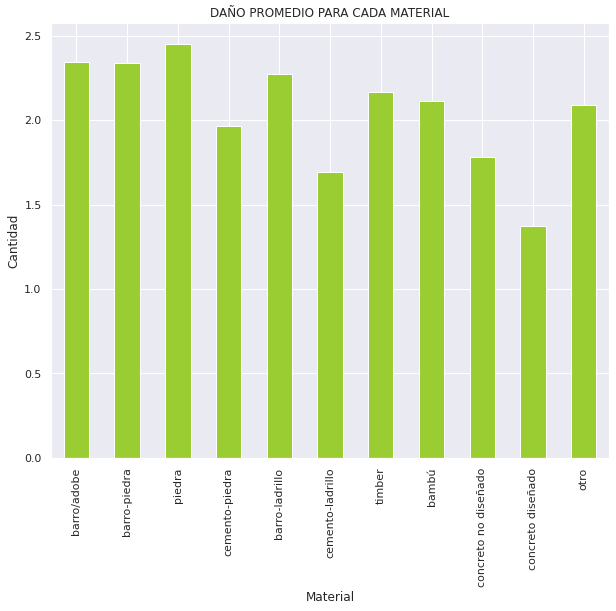

In [ ]:
df_media_materiales.mean().plot(kind = 'bar',xlabel= 'Material', ylabel = 'Cantidad',\
title = 'DAÑO PROMEDIO PARA CADA MATERIAL', color = '#9ACD32').set_xticklabels(nombres_x)

In [ ]:
df_cantidad_materiales_damage = df_danio_y_materiales.groupby('damage_grade').sum()
df_cantidad_materiales_damage

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


[Text(0, 0, 'barro/adobe'),
 Text(0, 0, 'barro-piedra'),
 Text(0, 0, 'piedra'),
 Text(0, 0, 'cemento-piedra'),
 Text(0, 0, 'barro-ladrillo'),
 Text(0, 0, 'cemento-ladrillo'),
 Text(0, 0, 'timber'),
 Text(0, 0, 'bambú'),
 Text(0, 0, 'concreto no diseñado'),
 Text(0, 0, 'concreto diseñado'),
 Text(0, 0, 'otro')]

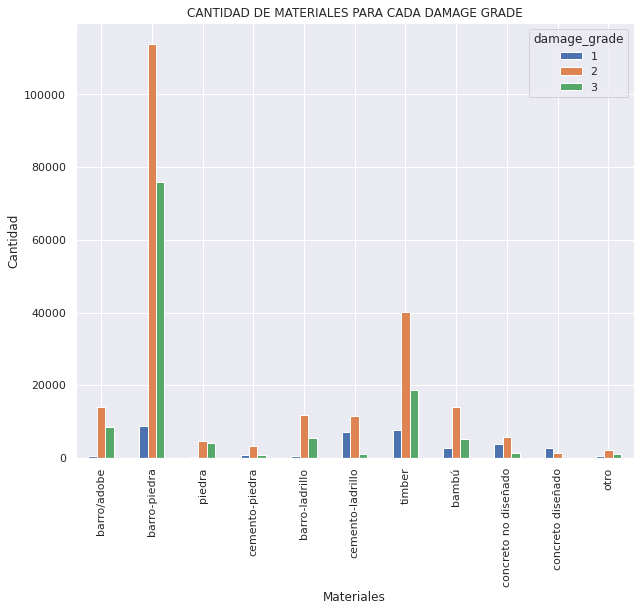

In [ ]:
df_cantidad_materiales_damage.T.plot(kind= 'bar',title = 'CANTIDAD DE MATERIALES PARA CADA DAMAGE GRADE',\
xlabel= 'Materiales', ylabel = 'Cantidad').set_xticklabels(nombres_x)

In [ ]:
df = df_danio_y_materiales.groupby('damage_grade').sum()
df

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


Text(0.5, 1.0, 'MATERIALES Y SUS DISTINTOS NIVELES DE DAÑO')

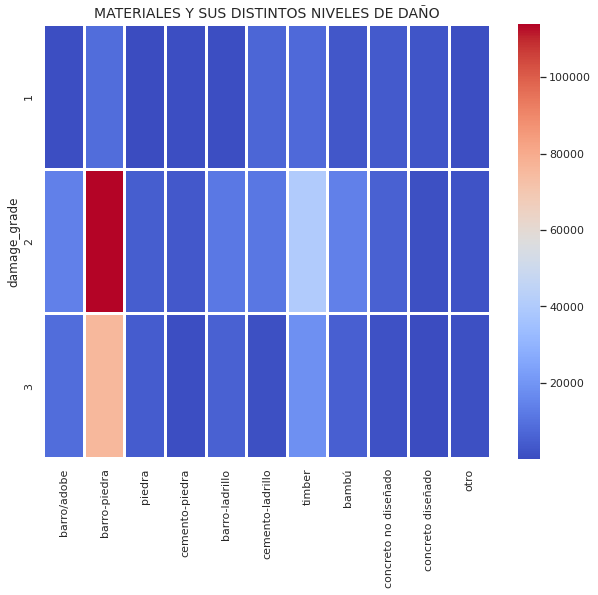

In [ ]:
heat_map = sns.heatmap(df, linewidths = 2, cmap= 'coolwarm')
heat_map.set_xticklabels(nombres_x)
heat_map.set_title("MATERIALES Y SUS DISTINTOS NIVELES DE DAÑO", fontsize = 14)

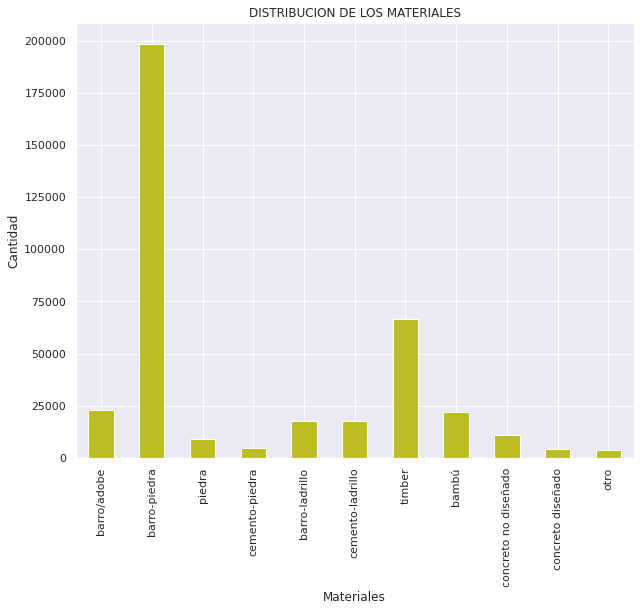

In [ ]:
df_materiales = df_con_damage.loc[:,materiales]
plot = df_materiales.sum().plot(kind = 'bar', color = 'tab:olive', title = 'DISTRIBUCION DE LOS MATERIALES',\
xlabel= 'Materiales', ylabel = 'Cantidad').set_xticklabels(nombres_x)

* cual era el uso principal?

[Text(0, 0, 'agricultura'),
 Text(0, 0, 'hoteleria'),
 Text(0, 0, 'renta'),
 Text(0, 0, 'institucional'),
 Text(0, 0, 'escolar'),
 Text(0, 0, 'industial'),
 Text(0, 0, 'salud'),
 Text(0, 0, 'gobierno'),
 Text(0, 0, 'policial'),
 Text(0, 0, 'otro')]

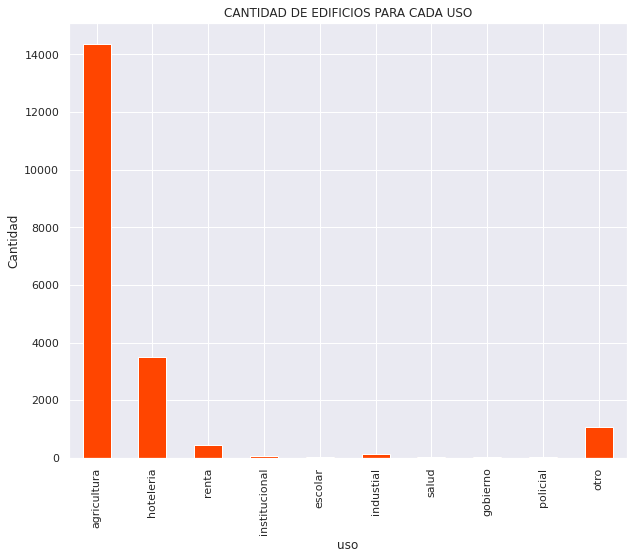

In [ ]:
train_values_dataset.loc[train_values_dataset['has_superstructure_mud_mortar_stone'] == 1, \
"has_secondary_use_agriculture" : "has_secondary_use_other"].sum().plot(kind = 'bar',xlabel= 'uso', ylabel = 'Cantidad',\
title = 'CANTIDAD DE EDIFICIOS PARA CADA USO', color = 'orangered').set_xticklabels(usos_edificios)

* mayor uso en agricultura talvez es una de las actividades mas frecuente en el pais y piedra - barro el principal material de construcciones para este rubro

### Analisis de Condicion de superficie

* los edificios que mas se vieron afectados (nivel 3): cual era la condicion de la tierra ?

In [ ]:
condicion_tierra_construcciones = train_values_dataset[['building_id', 'land_surface_condition']]
danio = condicion_tierra_construcciones.merge(train_labels_dataset, how= 'inner')[["damage_grade","land_surface_condition"]]
danio_nivel_3 = danio[danio['damage_grade'] == 3].value_counts('land_surface_condition').reset_index()\
.rename(columns = {0: 'edificios_danio_tres'})
danio_nivel_3

,land_surface_condition,edificios_danio_tres
0,t,72724
1,n,11488
2,o,3006


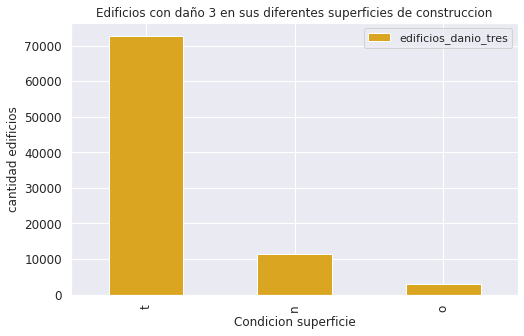

In [ ]:
danio_nivel_3.plot(kind= 'bar', x = 'land_surface_condition', y= 'edificios_danio_tres', \
title = 'Edificios con daño 3 en sus diferentes superficies de construccion', fontsize= 12,\
xlabel= 'Condicion superficie', ylabel= 'cantidad edificios',color='goldenrod',\
figsize = (8,5)).figure.savefig('condicion superficie.png')

* la condicion de tierra con letra t es la peor (mas insegura para un terremoto a priori)
* algun edificio/construccion que contenga muchas personas esta ubicada en esta categoria?

[Text(0, 0, 'agricultura'),
 Text(0, 0, 'hoteleria'),
 Text(0, 0, 'renta'),
 Text(0, 0, 'institucional'),
 Text(0, 0, 'escolar'),
 Text(0, 0, 'industial'),
 Text(0, 0, 'salud'),
 Text(0, 0, 'gobierno'),
 Text(0, 0, 'policial'),
 Text(0, 0, 'otro')]

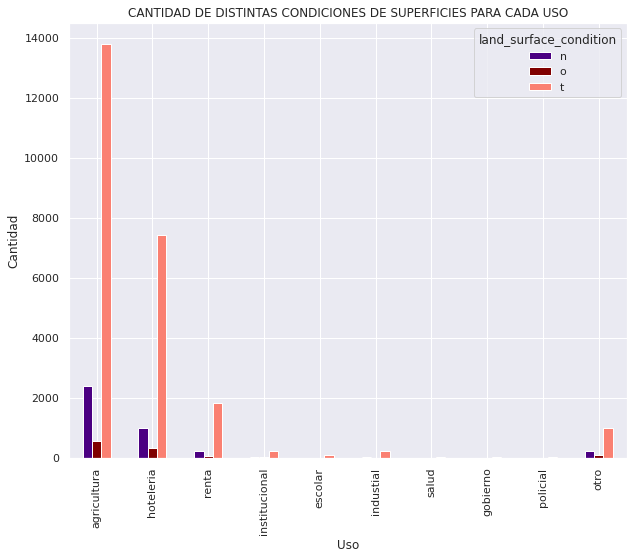

In [ ]:
train_values_dataset.groupby('land_surface_condition').sum().loc[:, "has_secondary_use_agriculture" : "has_secondary_use_other"].T.\
plot(kind = 'bar',xlabel= 'Uso', ylabel = 'Cantidad',\
title = 'CANTIDAD DE DISTINTAS CONDICIONES DE SUPERFICIES PARA CADA USO',color = ['indigo','maroon' , 'salmon']).set_xticklabels(usos_edificios)

* la condicion de tierra t es la mas frecuente en la zona, todas las edificaciones estan edificadas sobre esta 
* todas las estructuras tuvieron un daño nivel 2 mayormente pero las que mas numero de daño tuvieron con nivel 3 fueron la de piedra y barro  

[Text(0, 0, 'agricultura'),
 Text(0, 0, 'hoteleria'),
 Text(0, 0, 'renta'),
 Text(0, 0, 'institucional'),
 Text(0, 0, 'escolar'),
 Text(0, 0, 'industial'),
 Text(0, 0, 'salud'),
 Text(0, 0, 'gobierno'),
 Text(0, 0, 'policial'),
 Text(0, 0, 'otro')]

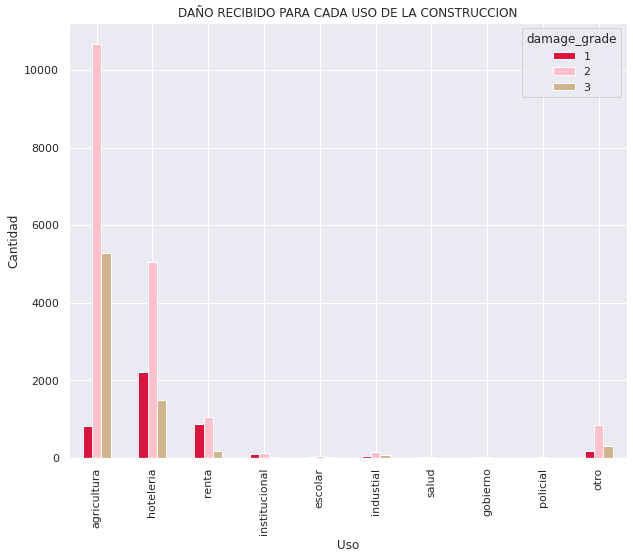

In [ ]:
df_con_damage.groupby('damage_grade').sum().loc[:,'has_secondary_use_agriculture': 'has_secondary_use_other'].T.plot(kind= 'bar',xlabel= 'Uso', ylabel = 'Cantidad',\
title = 'DAÑO RECIBIDO PARA CADA USO DE LA CONSTRUCCION', \
color = ['crimson','pink' , 'tan']).set_xticklabels(usos_edificios)

* por que si todas las construccines estan mayormente plantadas en las mismas condiciones de superficie algunas tuvieron mas daño?
* tanto hoteles y edificaciones para agricultura fueron los mas afectados por el material construido 


### Analisis Estado legal tierra

In [ ]:
df_con_damage['cant'] = 1
danio_estado_legal_tierra = df_con_damage[['damage_grade','legal_ownership_status', 'cant']]\
.groupby(['damage_grade', 'legal_ownership_status']).sum().reset_index()\
.pivot(index = 'legal_ownership_status', columns = 'damage_grade', values = 'cant')
danio_estado_legal_tierra

damage_grade,1,2,3
legal_ownership_status,,,
a,1511,3074,927
r,213,727,533
v,23270,143154,84515
w,130,1304,1243


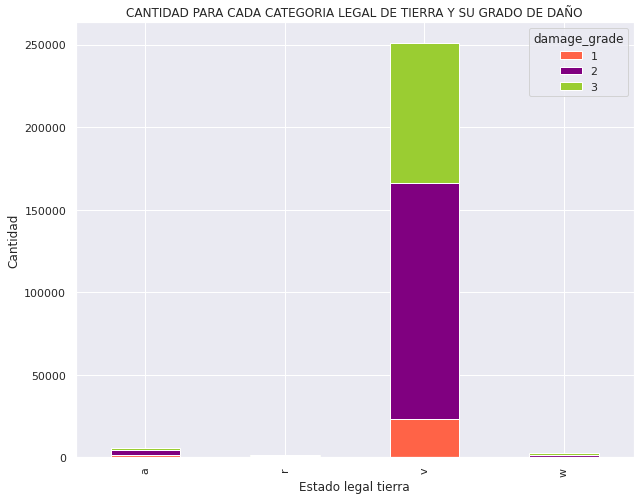

In [ ]:
danio_estado_legal_tierra.plot.bar(stacked = True, color = ['#FF6347', '#800080', '#9ACD32'],xlabel= 'Estado legal tierra', ylabel = 'Cantidad',\
title = 'CANTIDAD PARA CADA CATEGORIA LEGAL DE TIERRA Y SU GRADO DE DAÑO')

* sin categoria v de estado legal

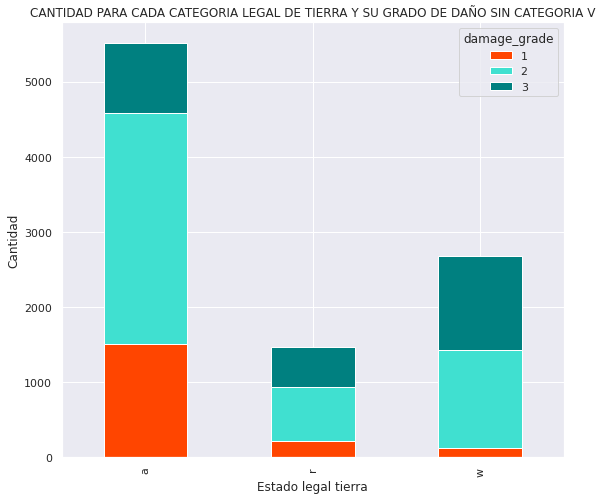

In [ ]:
df_con_damage['cant'] = 1
danio_estado_legal_tierra = df_con_damage[['damage_grade','legal_ownership_status', 'cant']]\
.groupby(['damage_grade', 'legal_ownership_status']).sum().reset_index()\
.pivot(index = 'legal_ownership_status', columns = 'damage_grade', values = 'cant')
danio_estado_legal_tierra.loc[['a', 'r','w'], :].plot.bar(stacked = True, color = ['orangered', 'turquoise', 'teal'], figsize = (9,8),xlabel= 'Estado legal tierra', ylabel = 'Cantidad',\
title = 'CANTIDAD PARA CADA CATEGORIA LEGAL DE TIERRA Y SU GRADO DE DAÑO SIN CATEGORIA V')

* que porcentaje de las las edificaciones con los materiales mas afectados tiene el estado legal v?

In [ ]:
total_estado_v = df_con_damage.loc[df_con_damage['legal_ownership_status'] == 'v'].value_counts('legal_ownership_status').at['v']

In [ ]:
cantidad_v_timber= df_con_damage.loc[(df_con_damage['has_superstructure_mud_mortar_stone'] == 0) & (df_con_damage['has_superstructure_timber'] == 1)\
&(df_con_damage['legal_ownership_status'] == 'v'), ['cant']]
cantidad_v_timber.sum()['cant']

15204

In [ ]:
cantidad_v_piedra_barro = df_con_damage.loc[(df_con_damage['has_superstructure_mud_mortar_stone'] == 1) & (df_con_damage['has_superstructure_timber'] == 0)\
&(df_con_damage['legal_ownership_status'] == 'v'), ['cant']]
cantidad_v_piedra_barro.sum()['cant']

146623

porcentaje piedra-barro

In [ ]:

(146623 / total_estado_v) * 100

58.42973790443096

porcentaje timber

In [ ]:

(15204 / total_estado_v) * 100

6.05884298574554

porcentaje total

In [ ]:

(161827 / total_estado_v) *100 

64.4885808901765

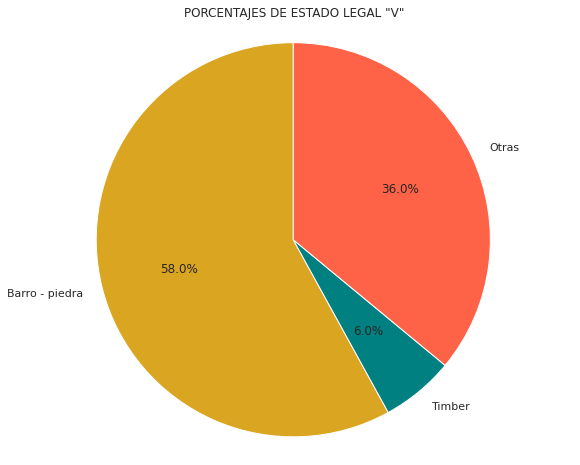

In [ ]:
colores = ['goldenrod','teal','tomato']
labels = 'Barro - piedra', 'Timber', 'Otras'
sizes = [58, 6, 36]
explode = (0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = colores, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 
plt.title('PORCENTAJES DE ESTADO LEGAL "V"')
plt.show()

Se puede decir que en la mayoria de la categoria 'v', las construcciones que se encuentran en ellas el daño por el terremoto fue mayor, lo cual hace pensar que es una poblacion de bajos recursos y las condiciones en donde se viven son sumamente precarias.

In [ ]:
# lo que sigue son graficos para otro analisis

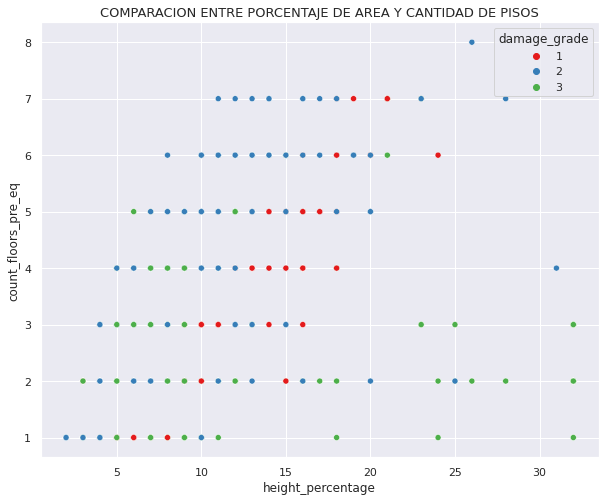

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
scatter = sns.scatterplot(x= 'height_percentage', y= 'count_floors_pre_eq' ,data = para_scatter, hue='damage_grade', palette= "Set1")
scatter.set_title("COMPARACION ENTRE PORCENTAJE DE AREA Y CANTIDAD DE PISOS", fontsize = 13).figure.savefig('scatter_pisos_altura.png')

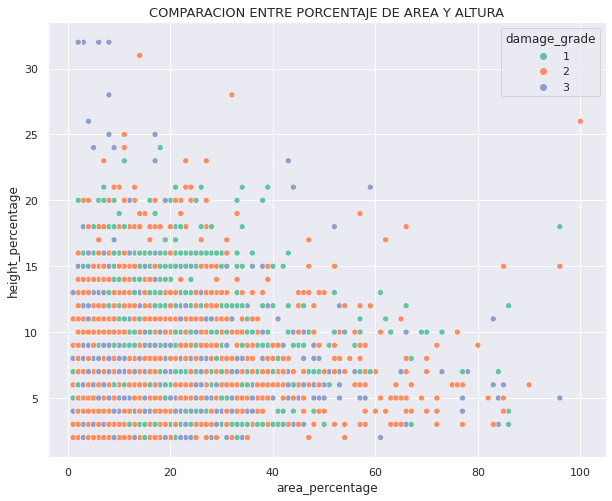

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
scatter = sns.scatterplot(x= 'area_percentage', y= 'height_percentage' ,data = df_con_damage, hue='damage_grade', palette= "Set2")
scatter.set_title("COMPARACION ENTRE PORCENTAJE DE AREA Y ALTURA", fontsize = 13).figure.savefig('scatter_area_altura.png')